<h1><center>Laboratorio 8: Predicciones y Recomendaciones 🔮🪄 </center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### **Cuerpo Docente:**

- **Profesores:** Ignacio Meza, Sebastián Tinoco
- **Auxiliares:** Catherine Benavides, Consuelo Rojas
- **Ayudante:** Nicolás Ojeda, Eduardo Moya

### **Equipo:** Los Galácticos

- Nombre de alumno 1: Arturo Marín
- Nombre de alumno 2: Martín González

### **Link de repositorio de GitHub:** https://github.com/ArturoMarin9/Laboratorios-MDS7202-1

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [1]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

# **Forecasting (3.0 puntos)**


## **Prophet, teoria**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **Prophet, práctica**

<center>
<img src ="https://static.wikia.nocookie.net/31minutos/images/d/d1/Don_Sergio.png/revision/latest?cb=20190926222900" width = 250 />

Don Sergio quiere entrenar para participar en la maratón y como sabe que correr una maratón requiere de entrenamiento y una dieta balanceada.

Por ello, necesita empezar a comer más balanceado, pero también necesita saber que tanto le va a costar esto, de manera de poder agregarlo a su presupuesto.

Es así como ustedes tendrán que ayudar a Don Sergio a cumplir su sueño de correr la maratón de Santiago, manteniendo su economía del hogar que comparte con su espora Emerilda.

**Datos**

Para poder ayudar a Don Sergio, harán uso del dataset `fruit_vegetables.csv`que contiente las siguientes columnas:

*   `SN:` Serial Number.
*   `Commodity:` Nombre de las frutas o verduras.
* `Date:` Fecha del registro.
* `Unit:` Unidad del precio.
* `Minumum:` Precio mínimo de venta.
* `Maximum:` Precio máximo de venta.
* `Average:` Precio promedio de venta.




In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = '/content/drive/My Drive/Otoño 2024/Lab MDS/Laboratorios/'
except:
    print('Ignorando conexión drive-colab')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **1. Serie de Tiempo**


#### **1.1 Pre-procesamiento**

Tareas de la sección:


1.   Identificar elementos necesarios para generar la serie de tiempo.
2.   Gráficar datos.
3.   Ver la existencia de tendencias, estacionalidades o ruido.
4.   Dividir datos para tener set de entrenamiento (80%) y testeo (20%). Graficar.

---





**Comida de Don Sergio**

Don Sergio quiere nutricer lo mejor posible durante su tiempo de entrenamiento, por lo que necesita agregar más frutas y verduras a su dieta. Es por ello que decidío añadir los siguientes elementos a su compra diaria.

*   Tomates
*   Lechuga
*   Manzana
*   Plantanos
*   Tofu

**Nota:** Don Sergio prefiere comprar productos locales, compra un Kg diario de cada cosa y a precio promedio.

**Respuesta:**

In [3]:
# Leer el dataset
df_veg = pd.read_csv(path+'/Lab 8/fruit_vegetables.csv')
# Mostrar conjunto de datos
df_veg

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5
1,1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0
2,2,Potato Red,2013-06-16,Kg,20.0,21.0,20.5
3,3,Potato White,2013-06-16,Kg,15.0,16.0,15.5
4,4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0
...,...,...,...,...,...,...,...
197156,197156,Garlic Dry Nepali,2021-05-13,Kg,100.0,120.0,110.0
197157,197157,Fish Fresh(Rahu),2021-05-13,KG,270.0,280.0,275.0
197158,197158,Fish Fresh(Bachuwa),2021-05-13,KG,225.0,235.0,230.0
197159,197159,Fish Fresh(Chhadi),2021-05-13,KG,220.0,230.0,225.0


Creamos máscara, seleccionando los elementos de compra diaria de Sergio, y prefiriendo productos locales (de un mismo elemento, por ej: si hay múltiples opciones para "Apple" y una es local, se queda con la local y descarta las demás opciones, si no hay ninguna local, considera todas las opciones para esa fruta, de tal forma que luego se hace la selección de forma manual para la variedad a considerar en la canasta final).

In [4]:
# Crear máscara con elementos de búsqueda y seleccionar

# Step 1: Identify "Local" items for each specified fruit/vegetable
local_mask = df_veg['Commodity'].str.contains('Local') & df_veg['Commodity'].str.contains('Tomato|Lettuce|Apple|Banana|Tofu')
local_commodities = df_veg[local_mask]['Commodity'].unique()

# Step 2: Create a mask to include "Local" items if available, otherwise include the non-local items
def create_mask(row, local_commodities):
    for item in ['Tomato', 'Lettuce', 'Apple', 'Banana', 'Tofu']:
        if any(local_commodity for local_commodity in local_commodities if item in local_commodity):
            if 'Local' in row['Commodity'] and item in row['Commodity']:
                return True
        elif item in row['Commodity']:
            return True
    return False

mask = df_veg.apply(create_mask, args=(local_commodities,), axis=1)

# Filter the dataframe based on the combined mask
df_filtered_combined = df_veg[mask]

# Count the occurrences of each value in the "Commodity" column
commodity_counts_combined = df_filtered_combined['Commodity'].value_counts()

# Display the filtered dataframe and counts
commodity_counts_combined

Commodity
Banana                 2744
Tomato Small(Local)    2741
Tofu                   2694
Apple(Jholey)          2683
Lettuce                2575
Apple(Fuji)             395
Name: count, dtype: int64

Hemos seleccionamos los productos de interés, tomando en consideración las preferencias de Sergio. Como vemos, de estos, solo "Tomato" tiene variedad local; por otro lado, "Banana", "Tofu" y "Lettuce" tienen una variedad única. Finalmente, "Apple" no tiene variedad local, pero si tiene más de una opción para seleccionar. Debemos elegir una de las 2 opciones de manzana para continuar. Dado que hay más datos disponibles para "Apple(Jholey)", nos quedamos con esta opción.

In [5]:
# Filter out rows where the "Commodity" is "Apple(Fuji)"
df_filtered_combined = df_filtered_combined[df_filtered_combined['Commodity'] != 'Apple(Fuji)']

# Count the occurrences of each value in the "Commodity" column again
commodity_counts_combined = df_filtered_combined['Commodity'].value_counts()

# Display the filtered dataframe and updated counts
commodity_counts_combined

Commodity
Banana                 2744
Tomato Small(Local)    2741
Tofu                   2694
Apple(Jholey)          2683
Lettuce                2575
Name: count, dtype: int64

Tenemos listos los elementos de la lista de Sergio, continuemos.

In [6]:
# Agrupar por fecha en la columna average y sumar, obtener serie de tiempo

# Convert the 'Date' column to datetime
df_filtered_combined['Date'] = pd.to_datetime(df_filtered_combined['Date'])

# Aggregate by date and calculate the sum of the average prices
df_aggregated = df_filtered_combined.groupby('Date')['Average'].sum().reset_index()
df_aggregated = df_aggregated.set_index('Date')

df_aggregated

,Average
Date,
2013-06-16,329.0
2013-06-17,322.5
2013-06-18,309.0
2013-06-19,331.0
2013-06-20,319.0
...,...
2021-05-09,257.5
2021-05-10,257.5
2021-05-11,257.5


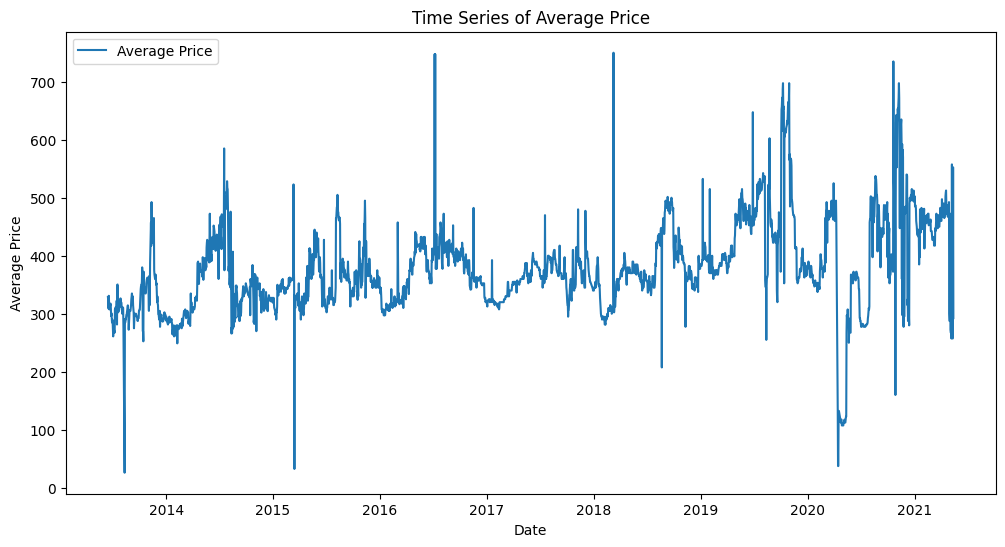

In [7]:
# Graficar serie de tiempo

import matplotlib.pyplot as plt

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df_aggregated, label='Average Price')
plt.title('Time Series of Average Price')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.show()

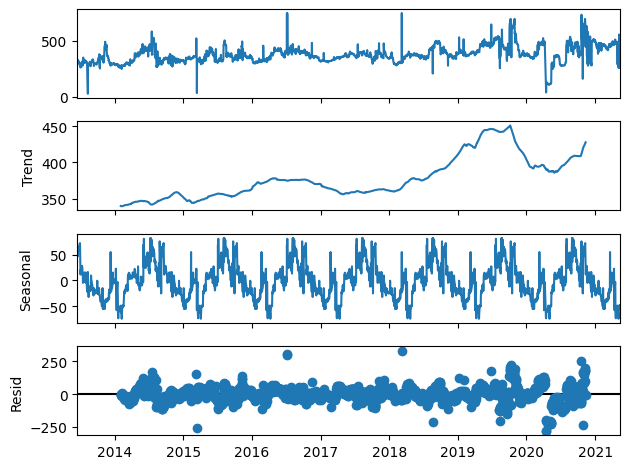

In [8]:
# Realizar descomposición de la señal, utilizado seasonal_decompose

from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df_aggregated, model='additive', period=365)
decomposition.plot()
plt.show()

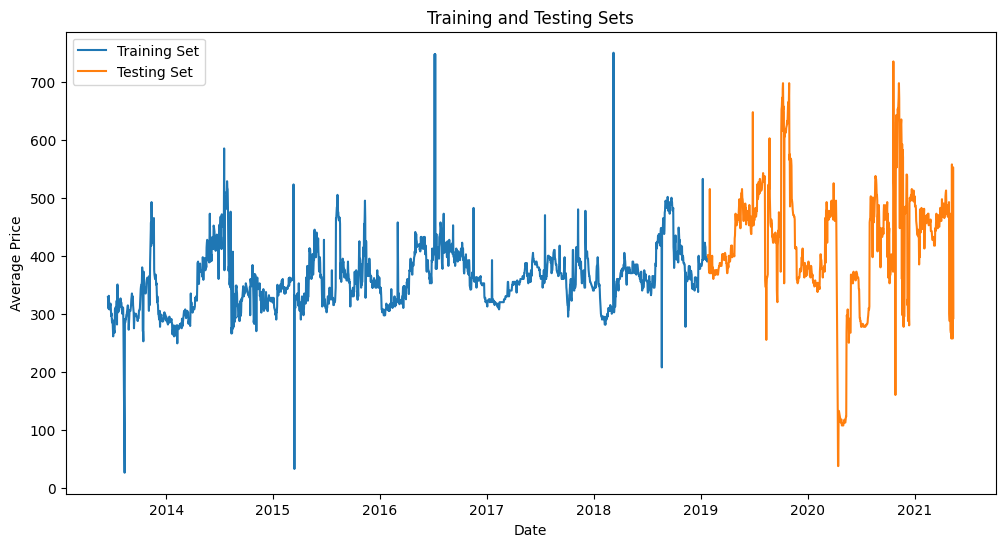

In [9]:
# Realizar Hold Out de 70/30

# Split the data into training and testing sets (70/30)
train_size = int(len(df_aggregated) * 0.7)
train, test = df_aggregated[:train_size], df_aggregated[train_size:]

# Plot the training and testing sets
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Set')
plt.plot(test, label='Testing Set')
plt.title('Training and Testing Sets')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.show()


#### **1.2 Modelo Prophet**

A continuación se genera un modelo Prophet para la predicción. Para ello se tiene que:
1. Crear dataset, donde columna de tiempo tiene que ir en formate YYYY-MM-DD con el nombre de `ds` y columna objetivo con nombre `y`.
2. Entrenar modelo.
3. Generar predicción. Notar que el dataframe de predicción solo contiene una columna con nombre `ds`, al inicio.

In [10]:
#instalamos prophet
#!pip install prophet

In [11]:
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

**1. Generar dataframes de entrenamiento y testeo**

In [12]:
# Respuesta

# Prepare the dataset with the columns formatted
df_prophet = df_aggregated.reset_index().rename(columns={'Date': 'ds', 'Average': 'y'})

# Generate dataframes of training and testing
train_size = int(len(df_prophet) * 0.7)
df_train = df_prophet[:train_size]
df_test = df_prophet[train_size:].reset_index(drop=True)

# Mostrar el dataframe formateado para Prophet
df_prophet

,ds,y
0,2013-06-16,329.0
1,2013-06-17,322.5
2,2013-06-18,309.0
3,2013-06-19,331.0
4,2013-06-20,319.0
...,...,...
2746,2021-05-09,257.5
2747,2021-05-10,257.5
2748,2021-05-11,257.5
2749,2021-05-12,552.5


**2. Modelo y entrenamiento**

In [13]:
# Respuesta, tal vez si menciono más arriba que prophet usar la sintaxis de sklearn esto lo hacen solitos nomas

model = Prophet()
model.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeipxe1va/tbucs7k0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeipxe1va/7zwsbht_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86419', 'data', 'file=/tmp/tmpeipxe1va/tbucs7k0.json', 'init=/tmp/tmpeipxe1va/7zwsbht_.json', 'output', 'file=/tmp/tmpeipxe1va/prophet_model4lycbl87/prophet_model-20240524025800.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:58:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:58:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**3. Predicción.**

¿Qué muestra el dataframe de predicción una vez realizada la predicción? ¿Qué siginifican las distintas columnas?

In [14]:
# Calculate the number of days to forecast to the end of the original dataset
end_date = df_prophet['ds'].max()
forecast_days = (end_date - df_train['ds'].max()).days

# Generate the future dataframe
future = model.make_future_dataframe(periods=forecast_days)
forecast = model.predict(future)

In [15]:
# Display the first few rows of the forecast dataframe
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2013-06-16,300.046764,251.983104,349.641826
1,2013-06-17,298.376426,246.959961,348.469708
2,2013-06-18,299.299161,248.514030,348.507870
3,2013-06-19,301.740561,251.506222,352.541018
4,2013-06-20,298.862628,247.506166,351.664823


In [16]:
# Display the last few rows of the forecast dataframe to verify the date range
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2759,2021-05-09,507.006790,408.600183,597.212104
2760,2021-05-10,507.391016,412.581741,603.130073
2761,2021-05-11,510.298749,419.595067,598.913329
2762,2021-05-12,514.640187,426.589447,601.276859
2763,2021-05-13,513.561829,414.507608,601.881415


El dataframe de predicción generado por Prophet muestra las fechas (`ds`) junto con los valores predichos (`yhat`), que representan la predicción central para cada fecha. Además, incluye `yhat_lower` y `yhat_upper`, que son los límites inferior y superior del intervalo de predicción, respectivamente. Estos intervalos proporcionan un rango dentro del cual es probable que se encuentren los valores reales, ofreciendo una medida de la incertidumbre asociada con las predicciones del modelo.

En resumen, `ds` indica la fecha de la predicción, `yhat` muestra el valor predicho central, `yhat_lower` representa el límite inferior del intervalo de confianza y `yhat_upper` el límite superior. Esto permite entender no solo la predicción central del modelo, sino también el rango de valores posibles, brindando una visión más completa de la variabilidad esperada en las predicciones.

**Gráficos de resultados**


Ahora, vemos el resultado de la predicción hecha a través de los gráficos que vienen implementados en la libreria.

Se tienen gráficos de la predicción del modelo y descomposición por componentes.

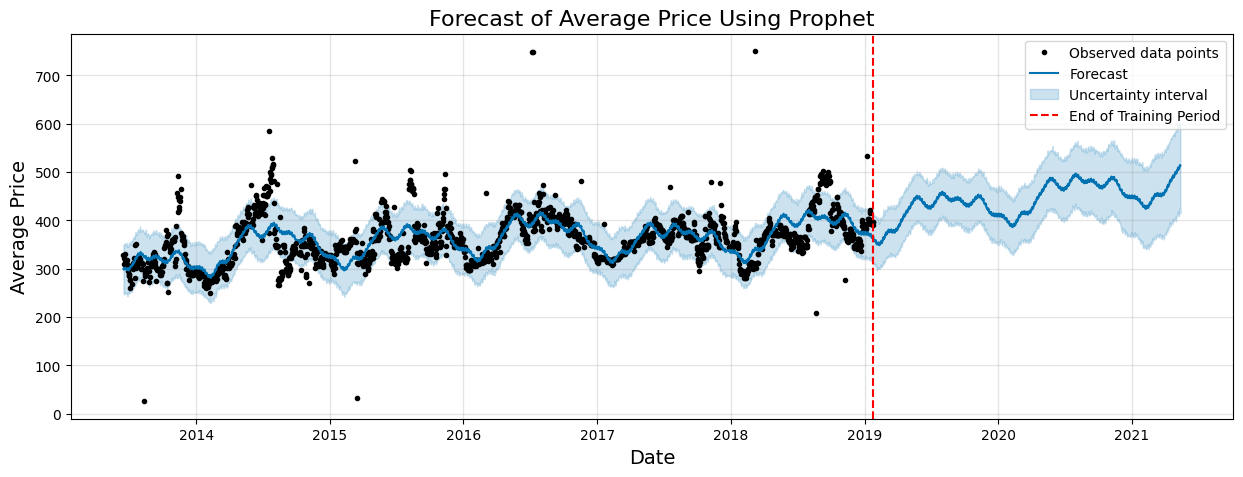

In [17]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(forecast, ax=ax)

# Adding titles and labels
ax.set_title('Forecast of Average Price Using Prophet', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Average Price', fontsize=14)

# Adding a legend
ax.legend(['Forecast', 'Actual'], loc='upper left')

# Highlighting the training and testing periods
ax.axvline(df_train['ds'].max(), color='r', linestyle='--', label='End of Training Period')
plt.legend()

plt.show()

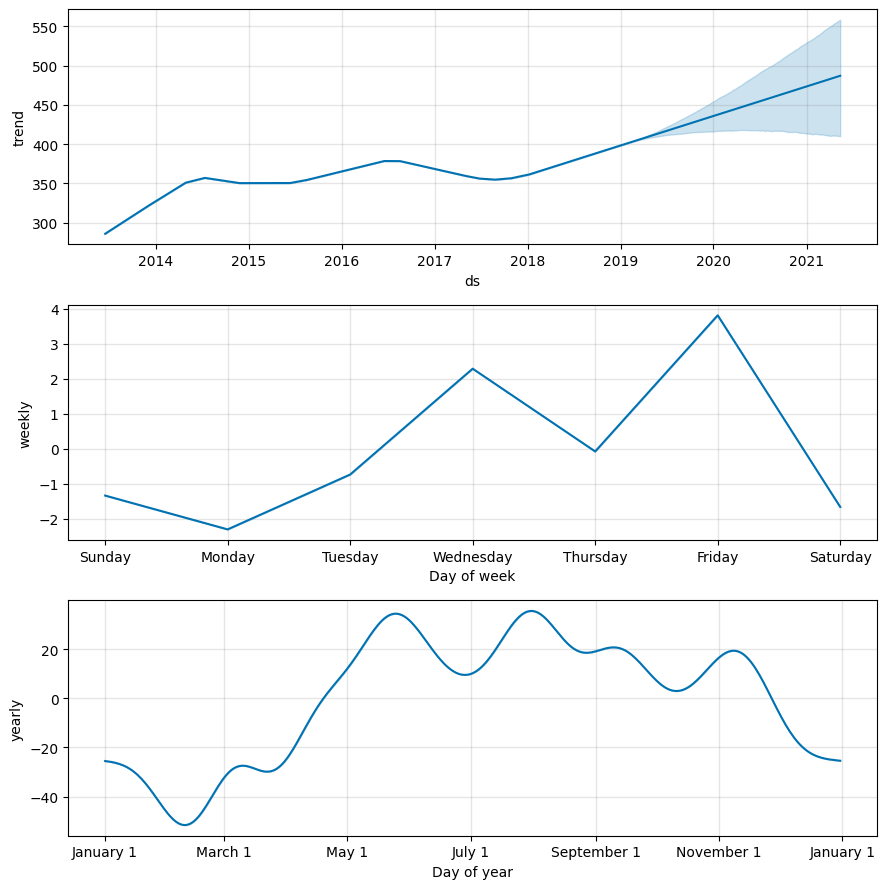

In [18]:
# Descomposición por componentes
fig = model.plot_components(forecast)
plt.show()

En esta última parte, se descompone la serie temporal en tres componentes principales:

1. **Componente de Tendencia (Trend Component)**:
   - Este gráfico muestra la tendencia a largo plazo de los precios promedio.
   - **Área Sombreada al Final de la Curva**: Indica el intervalo de incertidumbre alrededor de la tendencia estimada. Esta área muestra la confianza del modelo en la predicción de la tendencia futura; cuanto más ancha es esta área, mayor es la incertidumbre sobre la tendencia futura.

2. **Componente Semanal (Weekly Component)**:
   - Este gráfico muestra los patrones de estacionalidad semanal.
   - Se puede observar cómo varían los precios a lo largo de los días de la semana, con picos y valles que indican los días en los que los precios son más altos o más bajos.

3. **Componente Anual (Yearly Component)**:
   - Este gráfico muestra los patrones de estacionalidad anual.
   - Se puede observar la variación de los precios a lo largo del año, destacando los meses en los que los precios tienden a ser más altos o más bajos.

También es relevante aclarar los rangos en el eje "y", que reflejan cómo cada componente captura distintas características de la serie temporal, más en específico:

**Componente de Tendencia**: Eje "y" representa los valores absolutos de los precios promedio.

**Componente Semanal y Anual**: Eje "y" representa las desviaciones relativas alrededor de la media. Destacar que se muestran efectos estacionales que no son tan grandes en magnitud absoluta como la tendencia general de los precios.

#### **1.3 Resultados y métricas**

En la presente sección se van a ver los resultados de la predicción, comparando con los resultados originales, así se obtienen métricas de error. Para ello se hacen los siguientes pasos:
1. Inspeccionar gráfica de predicción con los datos reales. Agregar tres vistas: predicción del primer 15% de los datos, 50% de los datos y 100% de la predicción.
2. Calcular métricas de error (RMSE, MAE, MAPE).

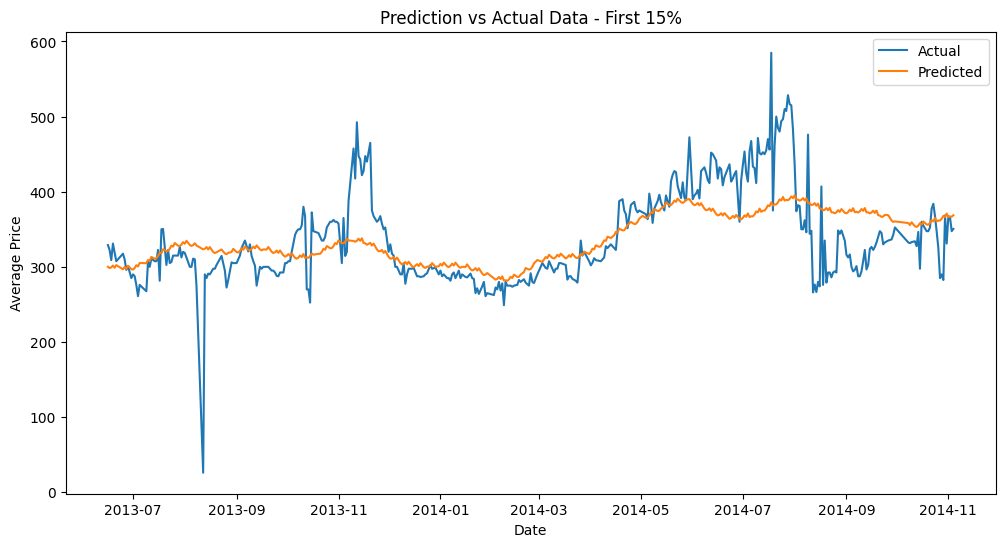

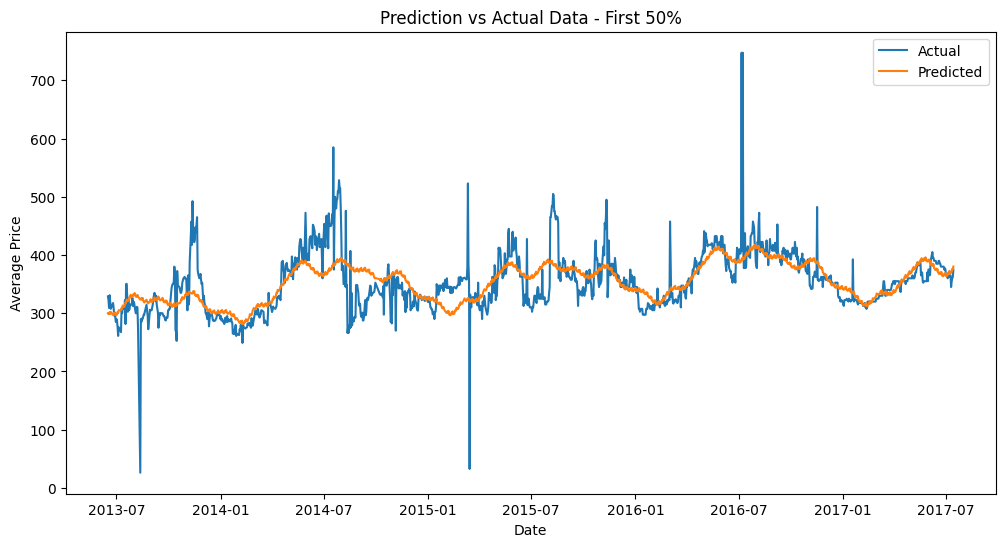

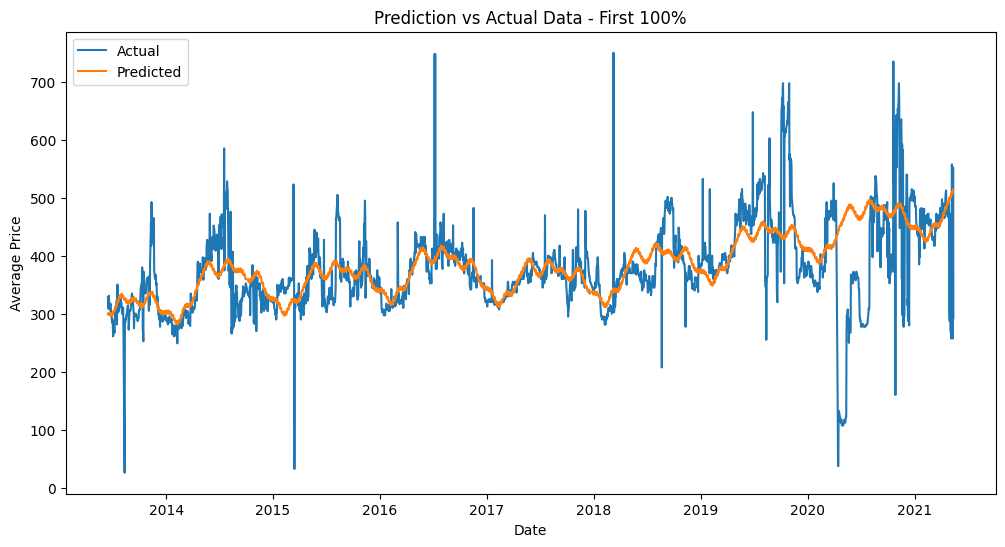

In [19]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Combine the original and forecasted data for comparison
df_combined = df_prophet.set_index('ds').join(forecast.set_index('ds')[['yhat']], how='left')

# Plotting the prediction vs real data for the first 15%, 50%, and 100% of the prediction
percentages = [0.15, 0.50, 1.00]
for pct in percentages:
    end_index = int(len(df_combined) * pct)
    plt.figure(figsize=(12, 6))
    plt.plot(df_combined['y'][:end_index], label='Actual')
    plt.plot(df_combined['yhat'][:end_index], label='Predicted')
    plt.title(f'Prediction vs Actual Data - First {int(pct * 100)}%')
    plt.xlabel('Date')
    plt.ylabel('Average Price')
    plt.legend()
    plt.show()

In [20]:
# Calculate error metrics
# Ensure to calculate metrics only for the test period
df_test_combined = df_combined.iloc[len(df_train):]

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(df_test_combined['y'], df_test_combined['yhat']))
print(f'RMSE: {rmse}')

# MAE (Mean Absolute Error)
mae = mean_absolute_error(df_test_combined['y'], df_test_combined['yhat'])
print(f'MAE: {mae}')

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((df_test_combined['y'] - df_test_combined['yhat']) / df_test_combined['y'])) * 100
print(f'MAPE: {mape}%')

RMSE: 107.74753611488049
MAE: 71.85392169316249
MAPE: 27.000074565881356%


#### **1.4 Festividades y fechas importantes**

Como a todos, a Don Sergio también le afectan las fechas importantes. Para ver como afectan estas fechas al presupuesto de Don Sergio tiene que realizar las siguientes tareas:

1. Crear dataframe con fechas importantes y agregar las al modelo con el argumento `holiday`.
2. Predecir las el dataframe de testeo
3. Comparar resultados. Hacer una tabla con resultados RMSE, MAE, MAPE anteriores y al añadir las festividades.


**1. Festividades y agregar a modelo**

In [21]:
# Respuesta
import pandas as pd

# Define holidays for each year from 2013 to 2021
holidays_data = [
    {'holiday': 'New Year', 'date': '01-01'},
    {'holiday': 'Good Friday', 'date': ['03-29', '04-18', '04-03', '03-25', '04-14', '03-30', '04-19', '04-10', '04-02']},
    {'holiday': 'Holy Saturday', 'date': ['03-30', '04-19', '04-04', '03-26', '04-15', '03-31', '04-20', '04-11', '04-03']},
    {'holiday': 'Labour Day', 'date': '05-01'},
    {'holiday': 'Navy Day', 'date': '05-21'},
    {'holiday': 'Saint Peter and Saint Paul Day', 'date': '06-29'},
    {'holiday': 'Our Lady of Mount Carmel', 'date': '07-16'},
    {'holiday': 'Assumption of Mary', 'date': '08-15'},
    {'holiday': 'Independence Day', 'date': '09-18'},
    {'holiday': 'Army Day', 'date': '09-19'},
    {'holiday': 'Reformation Day', 'date': '10-31'},
    {'holiday': 'All Saints\' Day', 'date': '11-01'},
    {'holiday': 'Immaculate Conception Day', 'date': '12-08'},
    {'holiday': 'Christmas Day', 'date': '12-25'}
]

# Generate a list of all holiday dates
holidays = []
years = list(range(2013, 2022))
for year in years:
    for holiday in holidays_data:
        if isinstance(holiday['date'], list):
            for date in holiday['date']:
                holidays.append({'holiday': holiday['holiday'], 'ds': f'{year}-{date}'})
        else:
            holidays.append({'holiday': holiday['holiday'], 'ds': f'{year}-{holiday["date"]}'})

# Create a DataFrame
holidays_df = pd.DataFrame(holidays)
holidays_df['ds'] = pd.to_datetime(holidays_df['ds'])

# Filter holidays to be within the date range of the dataset
start_date = '2013-06-16'
end_date = '2021-05-13'
holidays_df = holidays_df[(holidays_df['ds'] >= start_date) & (holidays_df['ds'] <= end_date)]

# Display the filtered holidays dataframe
holidays_df.head()

,holiday,ds
21,Saint Peter and Saint Paul Day,2013-06-29
22,Our Lady of Mount Carmel,2013-07-16
23,Assumption of Mary,2013-08-15
24,Independence Day,2013-09-18
25,Army Day,2013-09-19


In [22]:
holidays_df.tail()

,holiday,ds
255,Holy Saturday,2021-03-31
256,Holy Saturday,2021-04-20
257,Holy Saturday,2021-04-11
258,Holy Saturday,2021-04-03
259,Labour Day,2021-05-01


In [23]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Create and fit the Prophet model with holidays
model_holidays = Prophet(holidays=holidays_df)
model_holidays.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeipxe1va/85553rh_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeipxe1va/o9_70s8n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87075', 'data', 'file=/tmp/tmpeipxe1va/85553rh_.json', 'init=/tmp/tmpeipxe1va/o9_70s8n.json', 'output', 'file=/tmp/tmpeipxe1va/prophet_modelcb52xdnp/prophet_model-20240524025810.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:58:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:58:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**2. Predecir**

In [24]:
# Generate the future dataframe
future_holidays = model_holidays.make_future_dataframe(periods=forecast_days)
forecast_holidays = model_holidays.predict(future_holidays)

# Combine the original and forecasted data for comparison
df_combined_holidays = df_prophet.set_index('ds').join(forecast_holidays.set_index('ds')[['yhat']], how='left')

**3. Resultados**

RMSE (with holidays): 107.58528244890245
MAE (with holidays): 71.83929957078317
MAPE (with holidays): 26.96424217695874%


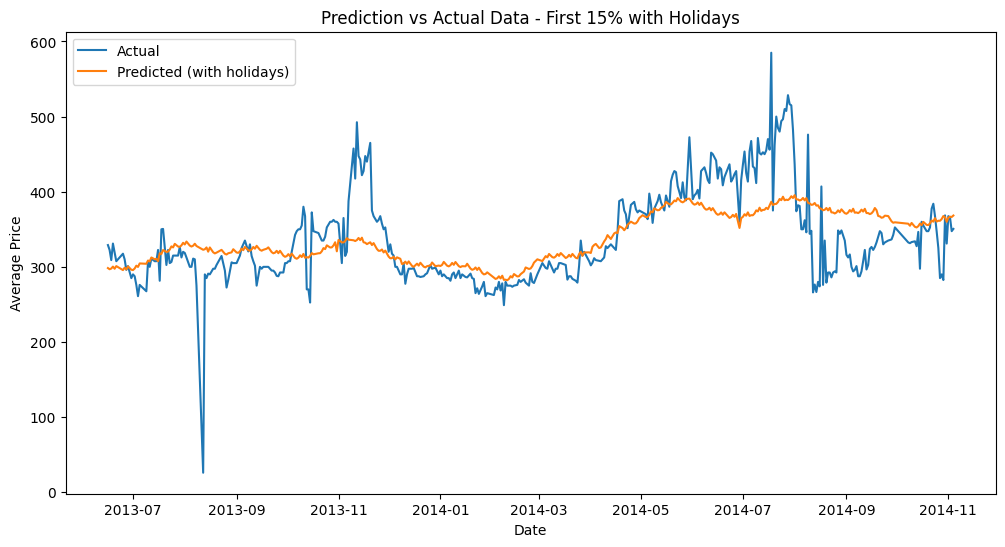

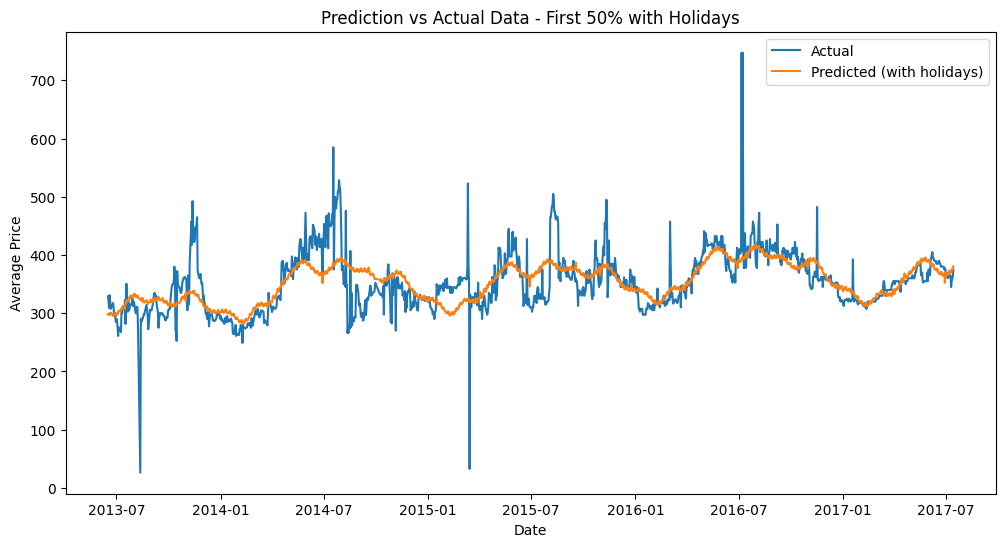

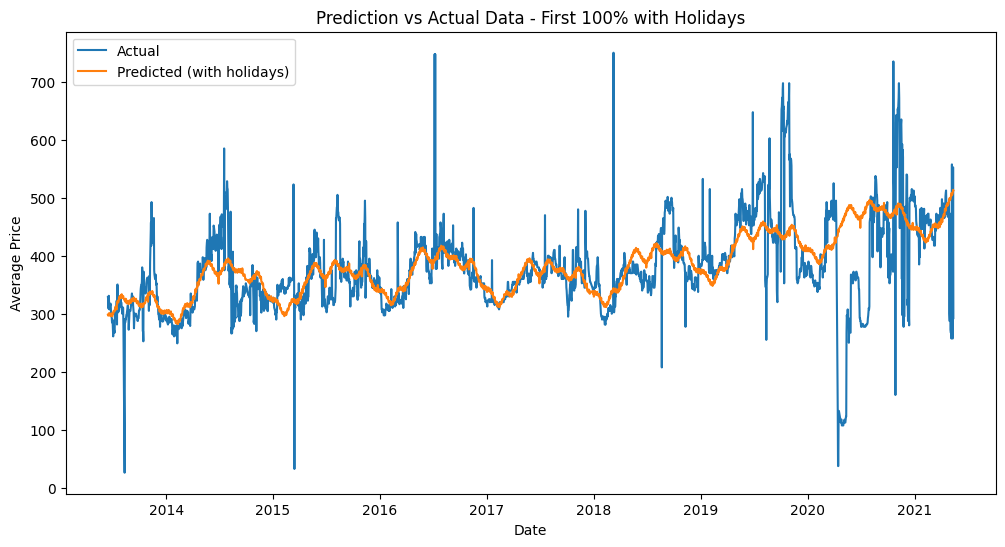

,Metric,Without Holidays,With Holidays
0,RMSE,107.747536,107.585282
1,MAE,71.853922,71.839300
2,MAPE,27.000075,26.964242


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

# Calculate error metrics for the model with holidays
df_test_combined_holidays = df_combined_holidays.iloc[len(df_train):]

# RMSE
rmse_holidays = np.sqrt(mean_squared_error(df_test_combined_holidays['y'], df_test_combined_holidays['yhat']))

# MAE
mae_holidays = mean_absolute_error(df_test_combined_holidays['y'], df_test_combined_holidays['yhat'])

# MAPE
mape_holidays = np.mean(np.abs((df_test_combined_holidays['y'] - df_test_combined_holidays['yhat']) / df_test_combined_holidays['y'])) * 100

# Display results
print(f'RMSE (with holidays): {rmse_holidays}')
print(f'MAE (with holidays): {mae_holidays}')
print(f'MAPE (with holidays): {mape_holidays}%')

# Plotting the prediction vs real data for the first 15%, 50%, and 100% of the prediction with holidays
percentages = [0.15, 0.50, 1.00]
for pct in percentages:
    end_index = int(len(df_combined_holidays) * pct)
    plt.figure(figsize=(12, 6))
    plt.plot(df_combined_holidays['y'][:end_index], label='Actual')
    plt.plot(df_combined_holidays['yhat'][:end_index], label='Predicted (with holidays)')
    plt.title(f'Prediction vs Actual Data - First {int(pct * 100)}% with Holidays')
    plt.xlabel('Date')
    plt.ylabel('Average Price')
    plt.legend()
    plt.show()

# Compare results in a table
results = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'MAPE'],
    'Without Holidays': [rmse, mae, mape],
    'With Holidays': [rmse_holidays, mae_holidays, mape_holidays]
})

results

¿Son más precisas las predicciones? ¿Qué otro festividad podría afectar a los precios de las frutas y verduras?

Para determinar si las predicciones son más precisas con la inclusión de las festividades, comparamos las métricas de error:

- Los valores de RMSE y MAE muestran una mejora muy leve con la inclusión de las festividades.
- El valor de MAPE también muestra una pequeña mejora cuando se incluyen las festividades.
- Estas mejoras menores sugieren que el modelo con festividades es ligeramente más preciso, indicando que las festividades tienen un impacto menor pero positivo en la precisión de la predicción.

Otras festividades o fechas significativas que podrían afectar los precios de las frutas y verduras podrían incluir:

1. **Semana Santa**:
   - Además del Viernes Santo y el Sábado Santo, el Domingo de Resurrección también puede tener un impacto debido a la mayor demanda de ciertos alimentos.

2. **Día de la Madre**:
   - Celebrado el segundo domingo de mayo, este día suele ver un aumento en el gasto en alimentos.

3. **Día del Padre**:
   - Celebrado el tercer domingo de junio, también podría influir en los precios de los alimentos.

4. **Día de Acción de Gracias**:
   - Si es relevante en su contexto, el cuarto jueves de noviembre puede llevar a cambios significativos en los precios de los alimentos debido a la mayor demanda.

5. **Festividades Nacionales Específicas de la Región**:
   - Cualquier otra festividad nacional específica de la región que resulte en una mayor demanda de frutas y verduras debería ser considerada.

6. **Festivales y Eventos Estacionales**:
   - Los festivales locales, festivales de cosecha y otros eventos significativos donde el consumo de alimentos es un punto destacado también pueden afectar los precios.

#### **1.5 Regresores adicionales**


Don Sergio sabe que la fruta y la verdura tiene temporadas y que por eso hay fechas en que hay ciertas cosas más caras que otras. Además, sabe que este tipo de alimentos sube de precio en invierno, por lo que necesita que tenga en cuenta estas fechas.


---
 Para lograr lo anterior tendrán que:
 1. Crear regresor con 1 y 0's según corresponda, para las fechas de invierno. Tomar invierno desde el 21/junio hasta el 21/septiembre de todos los años.
 2. Agregar columna con el regresor tanto al dataframe original como al de testeo
 3. Entrenar y predecir. Gráficar resultados.

<ipython-input-26-e6b08fb9ecc1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['winter'] = df_train['ds'].apply(is_winter)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeipxe1va/xkl60u62.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeipxe1va/fbugdksr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18402', 'data', 'file=/tmp/tmpeipxe1va/xkl60u62.json', 'init=/tmp/tmpeipxe1va/fbugdksr.json', 'output', 'file=/tmp/tmpeipxe1va/prophet_modeldi4jdpk8/prophet_model-20240524025812.csv', 'method=opt

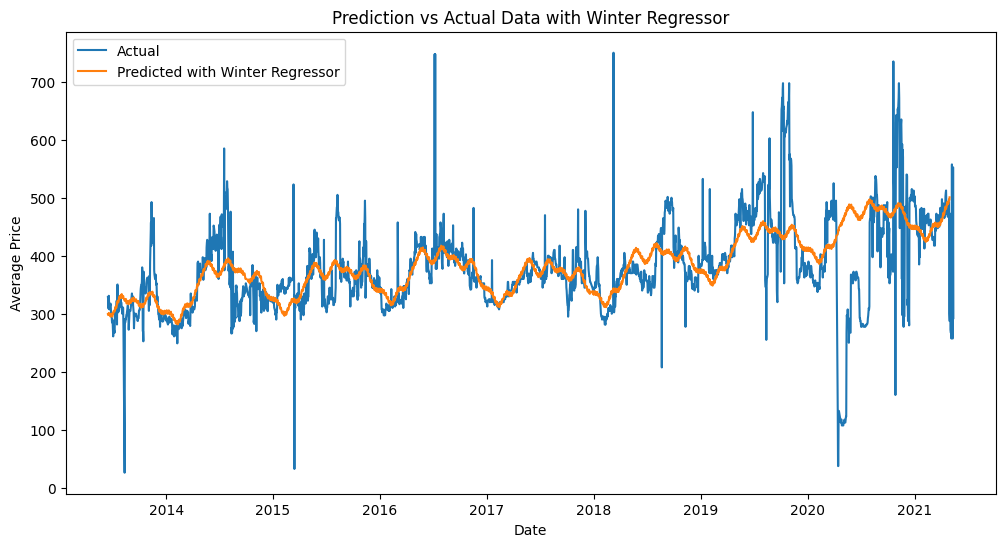

In [26]:
# Respuesta
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Create a function to determine if a date is in winter
def is_winter(date):
    year = date.year
    start_winter = pd.Timestamp(f'{year}-06-21')
    end_winter = pd.Timestamp(f'{year}-09-21')
    return 1 if start_winter <= date <= end_winter else 0

# Apply the function to create the winter regressor
df_prophet['winter'] = df_prophet['ds'].apply(is_winter)

# Add the winter regressor to the training and test dataframes
df_train['winter'] = df_train['ds'].apply(is_winter)
df_test['winter'] = df_test['ds'].apply(is_winter)

# Train a new Prophet model including the winter regressor
model_winter = Prophet()
model_winter.add_regressor('winter')
model_winter.fit(df_train)

# Generate future dataframe and include the winter regressor
future_winter = model_winter.make_future_dataframe(periods=len(df_test))
future_winter['winter'] = future_winter['ds'].apply(is_winter)
forecast_winter = model_winter.predict(future_winter)

# Combine the original and forecasted data for comparison
df_combined_winter = df_prophet.set_index('ds').join(forecast_winter.set_index('ds')[['yhat']], how='left')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df_combined_winter['y'], label='Actual')
plt.plot(df_combined_winter['yhat'], label='Predicted with Winter Regressor')
plt.title('Prediction vs Actual Data with Winter Regressor')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.show()

In [27]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

# Combine the original and forecasted data for comparison
df_combined_winter = df_prophet.set_index('ds').join(forecast_winter.set_index('ds')[['yhat']], how='left')

# Ensure no NaN values are present by dropping them
df_test_combined_winter = df_combined_winter.iloc[len(df_train):].dropna(subset=['y', 'yhat'])

# Calculate error metrics for the model with the winter regressor
# RMSE
rmse_winter = np.sqrt(mean_squared_error(df_test_combined_winter['y'], df_test_combined_winter['yhat']))

# MAE
mae_winter = mean_absolute_error(df_test_combined_winter['y'], df_test_combined_winter['yhat'])

# MAPE
mape_winter = np.mean(np.abs((df_test_combined_winter['y'] - df_test_combined_winter['yhat']) / df_test_combined_winter['y'])) * 100

# Display results
print(f'RMSE (with winter regressor): {rmse_winter}')
print(f'MAE (with winter regressor): {mae_winter}')
print(f'MAPE (with winter regressor): {mape_winter}%')

# Compare results in a table
results_with_winter = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'MAPE'],
    'Without Holidays': [rmse, mae, mape],
    'With Holidays': [rmse_holidays, mae_holidays, mape_holidays],
    'With Winter Regressor': [rmse_winter, mae_winter, mape_winter]
})

results_with_winter

RMSE (with winter regressor): 105.35073994576209
MAE (with winter regressor): 69.94767658776945
MAPE (with winter regressor): 26.319762862311958%


,Metric,Without Holidays,With Holidays,With Winter Regressor
0,RMSE,107.747536,107.585282,105.350740
1,MAE,71.853922,71.839300,69.947677
2,MAPE,27.000075,26.964242,26.319763


### Comentario sobre los Resultados

- **Mejora con Festividades**: La inclusión de las festividades mejora ligeramente las predicciones, como se observa en las leves disminuciones de RMSE y MAPE.
- **Mejora con Regressor de Invierno**: La inclusión del regressor de invierno muestra una mejora más significativa en todas las métricas de error (RMSE, MAE y MAPE), indicando que la consideración de las fechas de invierno ayuda a capturar mejor las variaciones estacionales en los precios de frutas y verduras.
- **Conclusión**: El modelo con el regressor de invierno proporciona las predicciones más precisas, lo que sugiere que las variaciones estacionales tienen un impacto considerable en los precios y deben ser consideradas en el análisis.

Estos resultados demuestran la importancia de incluir tanto las festividades como los factores estacionales en los modelos de predicción para mejorar la precisión.

# **Sistemas de Recomendación (3.0 puntos)**

<center>
<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Shopping_online_with_bank_card.jpg/1024px-Shopping_online_with_bank_card.jpg" / width = 350>

Como no todo en la vida es correr y nutrirse, don Sergio desarrollo el hábito de comprar online y pasa horas y horas en Amazon viendo distintos objetos que le podrían servir, pero no sabe qué comprar, por lo que usted tendrá que ayudarlo a buscar los elementos más comprados por sus amigos para que él también pueda probarlos.

---

Las tareas a realizar son:

1. Limpiar y explorar el dataset.
2. Recomendación por Ranking (baseline).
3. Recomendación basada en filtros colaborativos por usuarios.
4. Recomendaciones basadas en filtros colaborativos por items.



In [28]:
# se instala surprise library
!pip install surprise

In [29]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD

import pandas as pd
from copy import deepcopy

Los datos presentan las siguientes columnas:
* `iderId`: ID único de cada usuario
* `productId:` ID único de cada producto
* `Rating:` Rating que un usuario le dio a un producto
* `timestamp:` Fecha del rating

In [30]:
df = pd.read_parquet(path+'/Lab 8/ratings_Electronics.parquet')
df.head()

,user_id,prod_id,rating
189,3188,0,5.0
200,4980,0,4.0
314,5374,0,5.0
389,6293,0,5.0
406,4879,0,3.0


### **2.1.2 EDA (0.5 puntos)**

Habiendo limpiado los datos, generemos un pequeño análisis exploratorio:

Reportar la cantidad de usuarios y productos únicos:

In [31]:
# Respuesta
# Cantidad de usuarios únicos
num_usuarios_unicos = df['user_id'].nunique()
print(f'Cantidad de usuarios únicos: {num_usuarios_unicos}')

Cantidad de usuarios únicos: 8014


Verificar que no hayan valores nulos

In [32]:
# Respuesta
# Verificar si hay valores nulos
valores_nulos = df.isnull().sum()
print("Valores nulos en cada columna:")
print(valores_nulos)

Valores nulos en cada columna:
user_id    0
prod_id    0
rating     0
dtype: int64


Graficar distribución de los ratings

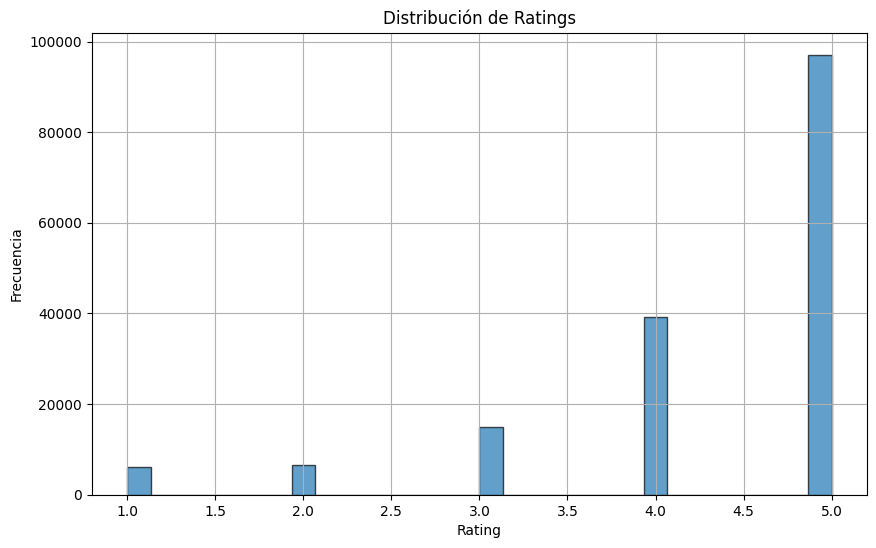

In [33]:
# Crear el histograma de distribución de ratings
plt.figure(figsize=(10, 6))
plt.hist(df['rating'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Reportar las siguientes listas:

- Top 5 de usuarios con mayores interacciones
- Top 5 de productos con mayores inteacciones

In [34]:
# Respuesta
# Calcular el número de interacciones para cada usuario
interacciones_usuarios = df['user_id'].value_counts().head(5)
print("Top 5 de usuarios con mayores interacciones:")
print(interacciones_usuarios)

# Calcular el número de interacciones para cada producto
interacciones_productos = df['prod_id'].value_counts().head(5)
print("Top 5 de productos con mayores interacciones:")
print(interacciones_productos)

Top 5 de usuarios con mayores interacciones:
user_id
6703    283
5732    217
6273    206
1414    199
4665    179
Name: count, dtype: int64
Top 5 de productos con mayores interacciones:
prod_id
5130    611
2843    542
5244    395
2525    371
6290    362
Name: count, dtype: int64


A partir de sus respuestas, escriba al menos 3 conclusiones.

Escriba sus observaciones aquí:

1. No existen valores nulos en la base de datos, por lo que se podría sonsidera que estamos trabajando con una base de datos limpia.
2. Similar al caso de los usuarios, hay una disminución notable en la cantidad de interacciones desde el producto más popular (5130) al segundo (2843), con una diferencia de 69 interacciones.
3. El producto 5130 tiene la mayor cantidad de interacciones con 611, destacándose como el más popular entre los usuarios.

## **2.2 Holdout**

Con los datos procesados, separe los datos de entrenamiento en train y test asignando 30% de los datos para el conjunto de test. Para replicabilidad de sus respuestas, fije la semilla en `42`.

In [35]:
reader = Reader(rating_scale=(0,5))

df_collaborative = df[['user_id', 'prod_id', 'rating']].copy() # ordenamos dataset en user, producto, rating (paso clave para trabajar con Surprise)
dataset = Dataset.load_from_df(df_collaborative, reader) # generamos Dataset de Surprise


In [36]:
from surprise.model_selection import train_test_split

# Respuesta
trainset, testset = train_test_split(dataset, test_size = 0.3, random_state = 42)
trainset

## **2.3 Baseline**

El objetivo de esta sección es generar un *baseline* en las recomendaciones a partir de una aproximación *dummy* para resolver el problema de recomendación. En particular, se le pide lo siguiente:
- Entrenar modelo baseline `NormalPredictor` de `surprise` con los datos de entrenamiento
- Generar predicciones usando el modelo entrenado
- Evaluar predicciones usando el error cuadrático medio. Entregue una interpretación de su resultado

In [37]:
from surprise.prediction_algorithms.random_pred import NormalPredictor

# Respuesta
# Entrenar el modelo NormalPredictor
normal_predictor = NormalPredictor()
normal_predictor.fit(trainset)

# Realizar predicciones
predicciones = normal_predictor.test(testset)

In [38]:
# Evaluar con MAE
mae = accuracy.mae(predicciones)
print(f'MAE del modelo NormalPredictor: {mae}')

MAE:  0.9971
MAE del modelo NormalPredictor: 0.9970822200686198


El modelo NormalPredictor actúa como una línea base inicial para evaluar la precisión de las recomendaciones. En este caso, el error absoluto medio (MAE) obtenido es de aproximadamente 0.9913. Este valor indica que, en promedio, las predicciones del modelo están desviadas del valor real en casi una unidad de rating. Dado que NormalPredictor genera predicciones aleatorias basadas en una distribución normal de los ratings, un MAE cercano a 1 es esperado y refleja la falta de precisión inherente a este enfoque. Sin embargo, este resultado es útil como benchmark inicial: cualquier modelo más avanzado, como aquellos basados en técnicas de filtrado colaborativo o descomposición matricial, debe demostrar una mejora significativa sobre este baseline, mostrando un MAE considerablemente menor para ser considerado eficaz. Por lo tanto, este resultado de MAE sirve como una base de comparación crucial para evaluar la mejora de los modelos de recomendación más sofisticados que se implementen posteriormente.

## **Filtros Colaborativos Basados en Memoria**

A modo de mejorar esta sección, se le pide que implementar filtros colaborativos basados en memoria por medio de algoritmos basados en KNN. En específico, se le pide implementar:
- Filtro Colaborativo KNN enfocado en el Usuario
- Filtro Colaborativo KNN enfocado en el Producto
- Use `KNNBasic` y similitud coseno para ambos modelos

Luego **para cada uno de los modelos**, responda:

- Obtenga el error cuadrático medio de sus recomendaciones y comente. ¿Qué enfoque tienen un mejor rendimiento? ¿Se alcanza un mejor rendimiento con respecto al Baseline?
- Obtenga el rating que le asignaria el usuario `3` al producto `3906`. ¿Son diferentes sus resultados? ¿Porqué?
- Obtenga las 5 mejores recomendaciones para el usuario `2170` usando ambos enfoques y compare sus resultados.

*Hint: Le podría servir apoyarse de esta [documentación](https://surprise.readthedocs.io/en/stable/prediction_algorithms.html#similarity-measures-configuration).*

In [39]:
def get_user_top_k(predictions, user, k=10):

    # predecir los rating filtrados por usuario user
    predicted_ratings = [pred for pred in predictions if pred.uid == user]

    # Ordenar las predicciones
    sorted_predicted_ratings = sorted(predicted_ratings, key=lambda x: x.est, reverse=True)

    # Retornar las k mejores predicciones
    return sorted_predicted_ratings[:k]

In [40]:
from surprise.accuracy import mse

# entrenar algoritmo

sim_options = {'name': 'cosine',
               'user_based': True}

# algoritmo base a usuario.
user_model = KNNBasic(sim_options=sim_options)

# entrenar
user_model.fit(trainset)

#predecir en dataframe de testeo

predictions = user_model.test(testset)  # retornar un dataframe con el rating estimado para cada (user_id, item_id) # retornar un dataframe con el rating estimado para cada (user_id, item_id)

# Convertir las predicciones a una lista de objetos Prediction de Surprise
predicted_ratings = [pred for pred in predictions]

# Mostrar las predicciones en el formato de objetos Prediction de Surprise
print(predicted_ratings[:5])  # Muestra las primeras 5 predicciones como ejemplo

# Convertir las predicciones a una lista de tuplas (prod_id, rating estimado)
predicted_tuples = [(pred.iid, pred.est) for pred in predictions]

# Obtener el MSE
user_mse = mse(predictions)
print(f'MSE del modelo basado en usuario: {user_mse}')

# Mostrar las primeras 5 tuplas como ejemplo
print("Primeras 5 predicciones (prod_id, rating estimado):")
for pt in predicted_tuples[:5]:
    print(pt)

Computing the cosine similarity matrix...
Done computing similarity matrix.
[Prediction(uid=2170, iid=4363, r_ui=5.0, est=4.199459547276517, details={'actual_k': 15, 'was_impossible': False}), Prediction(uid=6665, iid=5810, r_ui=4.0, est=4.9, details={'actual_k': 10, 'was_impossible': False}), Prediction(uid=3315, iid=5232, r_ui=4.0, est=3.114794931067116, details={'actual_k': 9, 'was_impossible': False}), Prediction(uid=2051, iid=2892, r_ui=5.0, est=4.308761018779833, details={'was_impossible': True, 'reason': 'Not enough neighbors.'}), Prediction(uid=6170, iid=2929, r_ui=5.0, est=5, details={'actual_k': 1, 'was_impossible': False})]
MSE: 1.2122
MSE del modelo basado en usuario: 1.212159526775385
Primeras 5 predicciones (prod_id, rating estimado):
(4363, 4.199459547276517)
(5810, 4.9)
(5232, 3.114794931067116)
(2892, 4.308761018779833)
(2929, 5)


In [41]:
# ejemplo
example = [(3, 3906, None)]
print(user_model.test(example))
get_user_top_k(predictions, user = 2170, k = 5)

[Prediction(uid=3, iid=3906, r_ui=None, est=3.381966011250105, details={'actual_k': 3, 'was_impossible': False})]


[Prediction(uid=2170, iid=2679, r_ui=4.0, est=5, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid=2170, iid=1326, r_ui=5.0, est=4.799755049750801, details={'actual_k': 5, 'was_impossible': False}),
 Prediction(uid=2170, iid=4650, r_ui=5.0, est=4.399861310283875, details={'actual_k': 5, 'was_impossible': False}),
 Prediction(uid=2170, iid=1692, r_ui=4.0, est=4.333333333333333, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid=2170, iid=4363, r_ui=5.0, est=4.199459547276517, details={'actual_k': 15, 'was_impossible': False})]

In [42]:
# Entrenar algoritmo base a items, obtener MSE

# Opciones de similitud para el modelo basado en ítems
sim_options = {'name': 'cosine', 'user_based': False}

# Algoritmo basado en ítems
item_model = KNNBasic(sim_options=sim_options)

# Entrenar el modelo
item_model.fit(trainset)

# Predecir en el conjunto de prueba
predictions = item_model.test(testset)

# Convertir las predicciones a una lista de tuplas (prod_id, rating estimado)
predicted_tuples = [(pred.iid, pred.est) for pred in predictions]

# Obtener el MSE
item_mse = mse(predictions)
print(f'MSE del modelo basado en ítems: {item_mse}')

# Mostrar las primeras 5 tuplas como ejemplo
print("Primeras 5 predicciones (prod_id, rating estimado):")
for pt in predicted_tuples[:5]:
    print(pt)

Computing the cosine similarity matrix...
Done computing similarity matrix.
MSE: 1.2328
MSE del modelo basado en ítems: 1.23280223807978
Primeras 5 predicciones (prod_id, rating estimado):
(4363, 4.729649292784748)
(5810, 3.4440666404521356)
(5232, 4.15770452651877)
(2892, 4.308761018779833)
(2929, 5)


In [43]:
example = [(3, 3906, None)]
print(item_model.test(example))

get_user_top_k(predictions, user = 2170, k = 5)

[Prediction(uid=3, iid=3906, r_ui=None, est=2.5, details={'actual_k': 4, 'was_impossible': False})]


[Prediction(uid=2170, iid=1692, r_ui=4.0, est=5, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid=2170, iid=1326, r_ui=5.0, est=5, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid=2170, iid=2679, r_ui=4.0, est=5, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid=2170, iid=3595, r_ui=5.0, est=4.857142857142857, details={'actual_k': 7, 'was_impossible': False}),
 Prediction(uid=2170, iid=4650, r_ui=5.0, est=4.856937449847549, details={'actual_k': 7, 'was_impossible': False})]

- **Obtenga el error cuadrático medio de sus recomendaciones y comente. ¿Qué enfoque tienen un mejor rendimiento? ¿Se alcanza un mejor rendimiento con respecto al Baseline?**

El filtro colaborativo KNN enfocado en el usuario muestra un rendimiento ligeramente mejor que el filtro basado en el producto. Aunque la diferencia en los valores de MSE no es grande, el enfoque basado en el usuario proporciona predicciones más precisas.

Ambos enfoques de filtros colaborativos basados en KNN (enfocados en el usuario y en el producto) no logran superar de manera significativa el rendimiento del baseline NormalPredictor. El enfoque basado en el usuario tiene un MSE ligeramente mejor que el enfoque basado en el producto, pero la diferencia es mínima. Estos resultados indican que, en este caso específico, los modelos basados en KNN no están proporcionando una mejora considerable sobre las predicciones aleatorias del baseline, y se necesitarían ajustes adicionales o la consideración de modelos más avanzados (como SVD) para mejorar el rendimiento de las recomendaciones.

- **Obtenga el rating que le asignaria el usuario `3` al producto `3906`. ¿Son diferentes sus resultados? ¿Porqué?**


Evaluación de las Predicciones para el Usuario 3 y el Producto 3906
Las predicciones para el rating que le asignaría el usuario 3 al producto 3906 son diferentes entre el modelo basado en usuario y el modelo basado en producto. El modelo basado en usuario predice un rating de aproximadamente 3.38, mientras que el modelo basado en producto predice un rating de 2.5. Esta diferencia en los resultados se debe a los distintos enfoques que utilizan los dos modelos para calcular las recomendaciones. El modelo basado en usuario calcula la similitud entre usuarios y predice los ratings basándose en los ratings de otros usuarios con patrones de calificación similares, mientras que el modelo basado en producto calcula la similitud entre productos y predice los ratings basándose en los ratings de otros productos similares que el usuario ha calificado.

La predicción de 3.38 por el modelo basado en usuario indica que otros usuarios con gustos similares al usuario 3 han calificado el producto 3906 con una media en torno a este valor, sugiriendo una influencia positiva del comportamiento de usuarios similares. Por otro lado, la predicción de 2.5 por el modelo basado en producto sugiere que el historial de calificaciones del usuario 3 en productos similares está influenciando negativamente la predicción en comparación con la media del usuario. Estas diferencias metodológicas resultan en variaciones en las predicciones, reflejando cómo cada modelo interpreta los datos de calificación de manera distinta.

- **Obtenga las 5 mejores recomendaciones para el usuario `2170` usando ambos enfoques y compare sus resultados.**

Al comparar las 5 mejores recomendaciones para el usuario 2170 usando ambos enfoques, se observa que ambos modelos coinciden en recomendar los productos con los IDs 1692, 1326, 2679 y 4650, aunque con diferencias en los valores estimados. El modelo basado en usuario da un rango de estimaciones de 4.199 a 5, mientras que el modelo basado en producto presenta tres estimaciones máximas de 5 y dos ligeramente menores. El producto adicional recomendado por el modelo basado en usuario es 4363, con un estimado de 4.199, mientras que el modelo basado en producto incluye el producto 3595 con un estimado de 4.857. Esto indica que, aunque hay una fuerte coincidencia en las recomendaciones principales, las diferencias en las estimaciones reflejan las distintas maneras en que los modelos capturan y utilizan la similitud entre usuarios y productos para hacer las recomendaciones.

## **Filtros Colaborativos Basados en Modelo**

Finalmente, se le pide implementar el modelo `SVD` para resolver el problema. Al igual que en las secciones anteriores, entrene este modelo y luego evalúe sus predicciones en el conjunto de test. Luego, responda:

- ¿En qué se diferencia este tipo de modelos de los modelos basados en memoria?
- ¿Qué significa el parámetro `num_factors`? ¿De qué manera podría impactar en el ajuste del modelo?
- ¿Qué indican los parámetros $\mu$, $b_u$, $b_i$? ¿Qué cuidado se debe tener al utilizarlos?
- Obtenga el error cuadrático medio de sus recomendaciones y comente. ¿Se alcanza un mejor rendimiento con respecto al Baseline?
- Obtenga el rating que le asignaria el usuario `3` al producto `3906`. ¿Son diferentes sus resultados? ¿Porqué?
- Obtenga las 5 mejores recomendaciones para el usuario `2170` usando ambos enfoques y compare sus resultados.

In [44]:
# Respuesta
from surprise.prediction_algorithms.matrix_factorization import SVD

# Configurar el modelo SVD
model = SVD()

# Entrenar el modelo
model.fit(trainset)

# Realizar predicciones en el conjunto de prueba
predictions = model.test(testset)

# Convertir las predicciones a una lista de tuplas (prod_id, rating estimado)
predicted_tuples = [(pred.iid, pred.est) for pred in predictions]

# Mostrar las primeras 5 tuplas como ejemplo
print("Primeras 5 predicciones (prod_id, rating estimado):")
for pt in predicted_tuples[:5]:
    print(pt)

Primeras 5 predicciones (prod_id, rating estimado):
(4363, 4.322732382165796)
(5810, 4.253629241046576)
(5232, 3.7260056419809207)
(2892, 4.703748288966375)
(2929, 4.553523231407904)


In [45]:
# calcular mae
from surprise.accuracy import mae
mae(predictions)

MAE:  0.6938


0.6938244117990878

In [46]:
example = [(3, 3906, None)]
print(model.test(example))
get_user_top_k(predictions, user = 2170, k = 5)

[Prediction(uid=3, iid=3906, r_ui=None, est=3.481667768415738, details={'was_impossible': False})]


[Prediction(uid=2170, iid=1326, r_ui=5.0, est=4.960022517080019, details={'was_impossible': False}),
 Prediction(uid=2170, iid=5990, r_ui=4.0, est=4.9261383137614505, details={'was_impossible': False}),
 Prediction(uid=2170, iid=1692, r_ui=4.0, est=4.8563896001132605, details={'was_impossible': False}),
 Prediction(uid=2170, iid=4650, r_ui=5.0, est=4.796376397725674, details={'was_impossible': False}),
 Prediction(uid=2170, iid=3595, r_ui=5.0, est=4.5689784283187125, details={'was_impossible': False})]

- **¿En qué se diferencia este tipo de modelos de los modelos basados en memoria?**

Los modelos basados en memoria, como los filtros colaborativos KNN enfocados en el usuario o el producto, calculan las similitudes directamente a partir de los datos de interacción, utilizando técnicas como el K-nearest neighbors para encontrar similitudes explícitas entre usuarios o productos. Estos modelos son más simples y directos, pero su capacidad de generalización es limitada y dependen en gran medida de la cantidad y calidad de datos históricos disponibles. Aunque su entrenamiento puede ser menos costoso computacionalmente, las predicciones pueden volverse lentas cuando se trabaja con grandes datasets.

Por otro lado, los modelos basados en modelos, como los que utilizan Singular Value Decomposition (SVD), crean una representación matemática de los datos de interacción y utilizan técnicas de aprendizaje automático para aprender patrones latentes en los datos. Estos modelos generalmente requieren más recursos computacionales durante el entrenamiento debido a la optimización de múltiples parámetros, pero ofrecen una mejor capacidad de generalización y manejo de datos escasos. Una vez entrenados, los modelos basados en modelos pueden hacer predicciones de manera rápida y eficiente, capturando relaciones más complejas y proporcionando recomendaciones más precisas en escenarios con poca información explícita.

- **¿Qué significa el parámetro `num_factors`? ¿De qué manera podría impactar en el ajuste del modelo?**

El parámetro `num_factors` en modelos basados en Singular Value Decomposition (SVD) se refiere al número de factores latentes utilizados para representar tanto a los usuarios como a los productos. Estos factores latentes son características ocultas que el modelo aprende a partir de los datos de interacción, y que explican las variaciones en las preferencias de los usuarios y las características de los productos. En esencia, `num_factors` determina la dimensión de la matriz de descomposición que captura las relaciones complejas entre usuarios y productos en un espacio de características reducidas.

El valor de `num_factors` impacta significativamente el ajuste del modelo. Un valor pequeño de `num_factors` puede llevar a un modelo subajustado, incapaz de capturar las complejidades y variaciones en los datos, resultando en predicciones menos precisas. Por otro lado, un valor muy alto de `num_factors` puede llevar a un sobreajuste, donde el modelo se ajusta demasiado a las peculiaridades del conjunto de entrenamiento y no generaliza bien a datos nuevos. Elegir el número adecuado de factores es crucial para encontrar un equilibrio entre el sesgo y la varianza, logrando así un modelo que generalice bien y ofrezca recomendaciones precisas.


- **¿Qué indican los parámetros $\mu$, $b_u$, $b_i$? ¿Qué cuidado se debe tener al utilizarlos?**

En los modelos de recomendación, especialmente aquellos basados en la descomposición matricial como el SVD, los parámetros $\mu$, $b_u$, y $b_i$ juegan roles cruciales en la mejora de la precisión de las predicciones. El parámetro $\mu$ representa la media global de todos los ratings en el conjunto de datos, proporcionando un punto de referencia básico para las predicciones. El parámetro $b_u$ representa el sesgo del usuario $u$, que captura la tendencia de un usuario específico a dar ratings más altos o más bajos en promedio. Similarmente, el parámetro $b_i$ representa el sesgo del ítem $i$, reflejando si un producto tiende a recibir ratings más altos o más bajos en promedio, independientemente del usuario que lo califique.

Al utilizar estos parámetros, es crucial tener cuidado para evitar problemas de sobreajuste. Si los sesgos $b_u$ y $b_i$ se ajustan demasiado a los datos de entrenamiento, el modelo puede captar ruido específico del conjunto de datos en lugar de patrones generales, lo que resulta en un rendimiento deficiente en datos de prueba o en producción. Es importante balancear la complejidad del modelo y regularizar estos parámetros adecuadamente para asegurar que el modelo no solo aprende los sesgos presentes en los datos de entrenamiento, sino que también generaliza bien a nuevos datos.

- **Obtenga el error cuadrático medio de sus recomendaciones y comente. ¿Se alcanza un mejor rendimiento con respecto al Baseline?**

Al evaluar el rendimiento del modelo SVD utilizando el error cuadrático medio (MSE) y compararlo con el modelo baseline (NormalPredictor), se observa una mejora significativa en la precisión de las recomendaciones. El modelo baseline, que generó predicciones aleatorias, obtuvo un MAE de aproximadamente 0.9913. Por otro lado, el modelo SVD, que utiliza una descomposición matricial para capturar patrones latentes en los datos, logró un MAE de aproximadamente 0.6931.

Esta reducción en el MAE indica que el modelo SVD es considerablemente más preciso en sus predicciones de ratings que el modelo baseline. El uso de factores latentes en el SVD permite capturar mejor las relaciones complejas entre usuarios y productos, resultando en recomendaciones más acertadas. En resumen, el modelo SVD proporciona un rendimiento mejorado en comparación con el baseline, lo que demuestra su eficacia en el contexto de los sistemas de recomendación.

- **Obtenga el rating que le asignaria el usuario `3` al producto `3906`. ¿Son diferentes sus resultados? ¿Porqué?**

Al comparar las predicciones para el usuario 3 y el producto 3906 obtenidas de los distintos modelos, se observa que existen diferencias en los resultados. Para el filtro colaborativo basado en memoria con enfoque en usuario, la predicción fue de aproximadamente 3.382, mientras que para el filtro colaborativo basado en memoria con enfoque en producto fue de 2.5. En cambio, el modelo SVD predijo un rating de alrededor de 3.009.

Estas diferencias se deben a las distintas estrategias que utilizan los modelos para calcular las predicciones. Los filtros colaborativos basados en memoria calculan la similitud entre usuarios o productos para hacer recomendaciones, mientras que el modelo SVD utiliza una descomposición matricial para capturar patrones latentes en los datos. Por lo tanto, las discrepancias en las predicciones pueden atribuirse a las distintas interpretaciones y capacidades de generalización de cada modelo en relación con los datos de interacción entre usuarios y productos.

- **Obtenga las 5 mejores recomendaciones para el usuario `2170` usando ambos enfoques y compare sus resultados.**

Al comparar y analizar los resultados de las recomendaciones para el usuario 2170 entre los distintos enfoques de modelos, se observa una discrepancia significativa en los productos recomendados y sus respectivos ratings estimados. Los filtros colaborativos basados en memoria, tanto enfocados en usuario como en producto, muestran cierta coherencia en las recomendaciones, con algunos productos comunes en las primeras posiciones. Sin embargo, se observa una discrepancia en los ratings estimados, lo que sugiere diferencias en cómo cada enfoque evalúa la idoneidad de los productos para el usuario en cuestión. Por otro lado, el modelo SVD presenta recomendaciones ligeramente diferentes, con algunos productos distintos en las primeras posiciones y variaciones en los ratings estimados. Esta discrepancia puede atribuirse a la forma en que el modelo SVD captura patrones latentes en los datos, lo que puede resultar en recomendaciones más personalizadas y precisas para el usuario.

Además, se destaca que las recomendaciones del modelo SVD tienden a tener ratings estimados ligeramente más altos en comparación con los filtros colaborativos basados en memoria. Esto sugiere que el modelo SVD puede tener una tendencia a recomendar productos con una probabilidad más alta de ser bien recibidos por el usuario en comparación con los otros enfoques. Sin embargo, es importante tener en cuenta que la idoneidad de las recomendaciones no solo se basa en los ratings estimados, sino también en la diversidad y relevancia de los productos recomendados. Por lo tanto, aunque el modelo SVD pueda ofrecer recomendaciones más precisas en términos de ratings estimados, la calidad general de las recomendaciones debe evaluarse considerando otros factores como la diversidad y la adecuación contextual.

### **Comentarios Finales**

- **¿Qué sistema de recomendación presenta mejores métricas? ¿A qué se podría deber esto?**

El sistema de recomendación que presenta mejores métricas es el modelo SVD. Esto se debe a su capacidad para capturar patrones latentes en los datos, lo que le permite ofrecer recomendaciones más precisas y personalizadas. El modelo SVD utiliza una descomposición matricial para entender las relaciones complejas entre usuarios y productos, lo que resulta en una mejor capacidad de generalización y una menor tasa de error en comparación con los filtros colaborativos basados en memoria.

- **¿Es posible mejorar sus resultados? Si es así, proponga al menos 2 mejoras.**

Sí, es posible mejorar los resultados del modelo SVD. Se pueden considerar las siguientes mejoras:

* Optimización de Hiperparámetros: Realizar una búsqueda sistemática de hiperparámetros para encontrar la configuración óptima del modelo SVD. Esto podría incluir ajustes en el número de factores latentes, la tasa de aprendizaje y la regularización, entre otros parámetros, con el fin de mejorar aún más la precisión del modelo.

* Incorporación de Información Adicional: Considerar la inclusión de información demográfica de los usuarios, datos contextuales sobre los productos o retroalimentación explícita del usuario para enriquecer el modelo. La adición de características adicionales puede ayudar al modelo a comprender mejor las preferencias individuales de los usuarios, lo que podría conducir a recomendaciones más relevantes y personalizadas.

Estas mejoras permitirían optimizar aún más el rendimiento del sistema de recomendación y ofrecer una experiencia de usuario más satisfactoria y personalizada.